# Exam Machine Learning 2: Computer Vision & Multimodal Models

## Personal information (please complete)

<table>
  <tr>
    <td>Name:</td>
    <td>Hersche</td>
  </tr>
  <tr>
    <td>Surname:</td>
    <td>Lucas</td>
  </tr>
  <tr>
    <td>Student ID Number:</td>
    <td>1408236</td>
  </tr>
  <tr>
    <td>Modul:</td>
    <td>Machine Learning 2</td>
  </tr>
  <tr>
    <td>Exam date / Room / Time:</td>
    <td>20.5.2025 / Raum: SM O1.01 / 18:15 – 19:45</td>
  </tr>
  <tr>
    <td>Allowed materials:</td>
    <td>w.3ML2-WIN.GK (Machine Learning II)<br>Open Book, Open Internet, Personal Computer</td>
  </tr>
  <tr>
  <td>Not allowed:</td>
  <td>The use of any form of generative AI (e.g., Copilot, ChatGPT) to assist in solving the exercise is not permitted. <br> However, using such tools as part of the exercise itself (e.g., making API calls to them if required by the task) is allowed. <br> Any form of communication or collaboration with other people is not permitted</td>
</tr>
</table>

## Evaluation criteria

The code for each task is evaluated according to the following scheme. The total score is a maximum of 48 points, with each task earning up to 8 or 4 points respectively.


| **Category**                         | **Description**                                                                                                                                               | **Points Distribution**                 |
|-------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------|-----------------------------------------|
| **Code not executable or results not relevant** | The code does not run or does not meet the requirements of the aspect (e.g., images are not loaded, text output from extraction is missing, bounding boxes are not displayed). | **0 points**                            |
| **Code executable, but with major flaws**         | The code runs, but key parts of the functionality for an aspect are missing (e.g., incomplete extraction of image information or errors in schema definition). | **25% of the maximum achievable points** |
| **Code executable, but with moderate flaws**      | The code runs and provides partially correct results for an aspect, but important details are missing (e.g., inaccurate bounding boxes, incomplete integration of extracted data). | **50% of the maximum achievable points** |
| **Code executable, but with minor flaws**         | The code largely meets the requirements of an aspect, but there are minor errors or deviations (e.g., extraction not robust, slight schema mismatches, prompt not clearly formulated → partially unstable output). | **75% of the maximum achievable points** |
| **Code executable and correct**                  | The code fully meets the requirements of the aspect and delivers the expected results without errors (e.g., correct extraction, complete bounding boxes, clean integration). | **100% of the maximum achievable points** |






## **Preparation**

1.) pip install the needed packages (see cell under). 

2.) Load your API keys in a new .env file in the temporary Colab Space or GitHub Codespace, as well as drag and drop the provided images for the exam (for Codespace not needed: they are in the repository)

IMPORTANTE NOTE: Be aware that to import specific packages later in the code (depending on how you decide to solve the exercise and where you are running it), might require installing the relative library before. Therefore you might need more "!pip install..." cells.

In [1]:
!pip install python-dotenv


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip


## **Task**

### **Task Description**

As part of this assignment, you are asked to perform object detection, with a model of your choice which uses textual information to identify relevant elements in images.

**Context:**
In this scenario, a staff member (e.g., a human nurse or triage assistant) is conducting initial patient intake at a clinic. As part of this process, the staff member interviews each arriving patient and takes handwritten notes, including details such as personalia, symptoms, background information, required diagnostics or tests. These notes are recorded on a medical_note.png file.

After the triage process, the patients move to a waiting area, shown in **`hospital_waiting_room.png`**, where multiple people are present, including patients, visitors, and medical staff.

You are developing a program for a hypothetical reception steward robot. This robot is responsible for reading the triage notes and correctly identifying the patient in the waiting room who matches the description and the next location where the patient needs to be brought (e.g. radiology, lab, doctor examiantion room).
The first patient you need to identify is the one described in **`medical_note1.png`**.

**Objective:**


Analyze the information in **`medical_note1.png`** and extract them in a structured form, based on a predefined extraction schema.
Identify the correct individual in **`hospital_waiting_room.png`** based on the relevant attributes extracted from the medical note.
Identify the room where the person needs to be brought based on the relevant attributes extracted from the medical note.
Draw a bounding box around the identified person and identified room and save the resulting image as **`hospital_waiting_room_person1identified.jpeg`**.

To test generalizability, repeat the process using a second patient, contained in **`medical_note2.png`**:

Use **`medical_note2.png`**, and save the output image as **`hospital_wiaiting_room_patient2_identified.png`**.

Note:
You may use any model of your choice. Focus on how to extract structured or relevant information from the textual note and effectively match it to the visual content of the image.



**Results to be Uploaded (Moodle)**  
  The following documents must be uploaded at the end of this task in the dedicated section in Moodle:  
  - The Notebook file you used (this file) with all the code provided by you to solve the task.  
  - The obtained image **`hospital_waiting_room_person1identified`**.  
  - the obtained image **`hospital_waiting_room_person2identified`**.  

## Utils (Helper Functions):

Here you will find some pre-made functions to help you visualize and plot bounding boxes, as well as parse different types of output. You can use these or create new functions yourself if necessary

In [2]:
import json
from PIL import Image, ImageDraw
from PIL import ImageColor
from dotenv import load_dotenv
import re
import os

additional_colors = [colorname for (colorname, colorcode) in ImageColor.colormap.items()]

def plot_bounding_boxes(im, noun_phrases_and_positions):
    """
    Plots bounding boxes on an image with markers for each noun phrase, using PIL, normalized coordinates, and different colors.

    Args:
        img_path: The path to the image file.
        noun_phrases_and_positions: A list of tuples containing the noun phrases
         and their positions in normalized [y1 x1 y2 x2] format.
    """

    # Load the image
    img = im
    width, height = img.size
    print(img.size)
    # Create a drawing object
    draw = ImageDraw.Draw(img)

    # Define a list of colors
    colors = [
    'red',
    'green',
    'blue',
    ] + additional_colors

    # Iterate over the noun phrases and their positions
    for i, (noun_phrase, (y1, x1, y2, x2)) in enumerate(
        noun_phrases_and_positions):
        # Select a color from the list
        color = colors[i % len(colors)]

        # Convert normalized coordinates to absolute coordinates
        abs_x1 = int(x1/1000 * width)
        abs_y1 = int(y1/1000 * height)
        abs_x2 = int(x2/1000 * width)
        abs_y2 = int(y2/1000 * height)

        # Draw the bounding box
        draw.rectangle(
            ((abs_x1, abs_y1), (abs_x2, abs_y2)), outline=color, width=4
        )

        # Draw the text
        draw.text((abs_x1 + 8, abs_y1 + 6), noun_phrase, fill=color)

    # Display the image
    img.show()

# @title Parsing utils
def parse_list_boxes(text):
  result = []
  for line in text.strip().splitlines():
    # Extract the numbers from the line, remove brackets and split by comma
    try:
      numbers = line.split('[')[1].split(']')[0].split(',')
    except:
      numbers =  line.split('- ')[1].split(',')

    # Convert the numbers to integers and append to the result
    result.append([int(num.strip()) for num in numbers])

  return result


def parse_list_boxes_with_label(text):
  text = text.split("```\n")[0]
  return json.loads(text.strip("```").strip("python").strip("json").replace("'", '"').replace('\n', '').replace(',}', '}'))



def parse_json_in_output(output):
    """
    Extracts and converts JSON-like data from the given text output to a Python dictionary.

    Args:
        output (str): The text output containing the JSON data.

    Returns:
        dict: The parsed JSON data as a Python dictionary.
    """
    # Regex to extract JSON-like portion
    json_match = re.search(r"\{.*?\}", output, re.DOTALL)
    if json_match:
        json_str = json_match.group(0)


        # Fix single quotes and ensure proper JSON formatting
        json_str = json_str.replace("'", '"')  # Replace single quotes with double quotes
        print(json_str)
        try:
            # Convert the fixed JSON string into a dictionary
            json_data = json.loads(json_str)
            return json_data
        except json.JSONDecodeError:
            return "The extracted JSON is still not valid after formatting."
    else:
        return "No JSON data found in the given output."

### <b>Task (1): Loading and Visualizing Images / Importing Necessary Libraries</b>
Details of the task:

Load and visualize the images medical_note1.png and hospital_waiting_room.png.
Import the necessary libraries for this assignment here.

<b style="color: gray;">(maximum achievable points: 4)</b>



In [3]:
# Import required libraries
from PIL import Image  # For loading and handling images

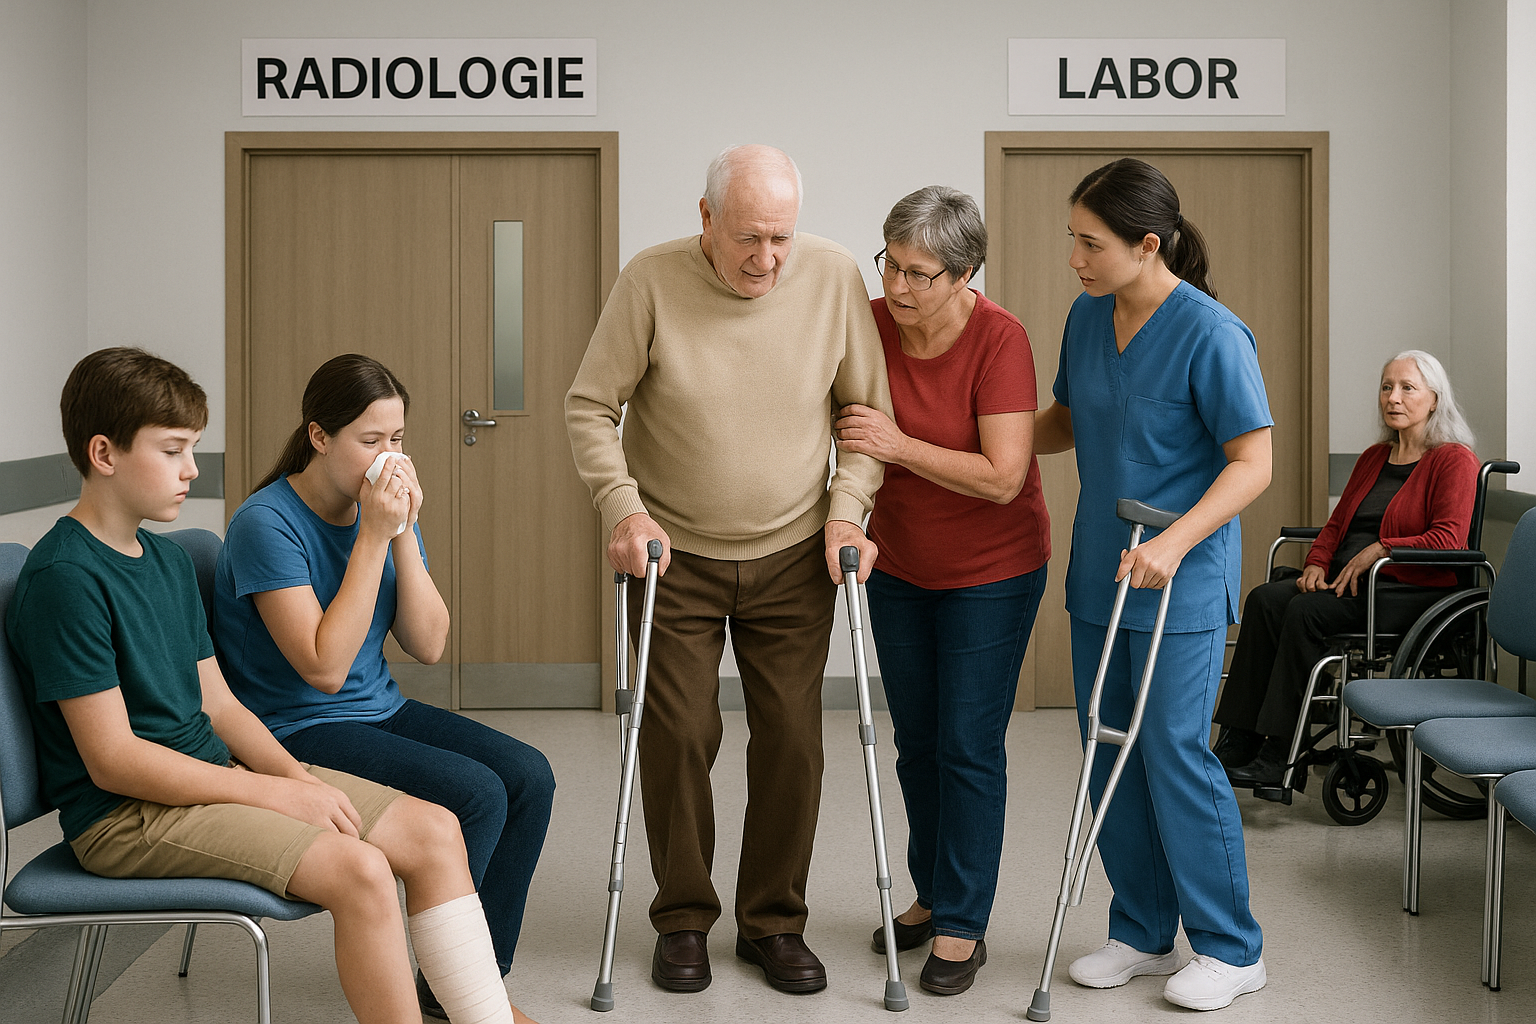

In [7]:
image1 = Image.open("medical_note1.png")
image2 = Image.open("hospital_waiting_room.png")
image1
image2

### <b>Task (2): Definition of a Structured Schema for Information Extraction</b>
Details of the task:

Define a structured schema (e.g., a JSON schema) to organize the information extracted from the image medical_note1.png. The schema should clearly define the fields and structure required to represent the extracted data.
Pay attention to how the parsing function is defined – you might need to modify it if nested elements are present in your schema.

<b style="color: gray;">(maximum achievable points: 8)</b>



In [16]:
template_answer = {
  "type": "json_schema",
  "json_schema": {
    "name": "img_extract",
    "schema": {
      "type": "object",
      "properties": {
        "patient": {
          "type": "array",
          "description": "Details about each person in the scene",
          "items": {
            "type": "object",
            "properties": {
              "patientID": {
                "type": "string",
                "description": "ID of the Patient"
              },
              "name": {
                "type": "string",
                "description": "Name of the Patient"
              },
              "gender": {
                "type": "string",
                "description": "Perceived gender identity",
                "enum": ["male", "female", "non-binary", "other", "prefer not to say"]
              },
              "birthdate": {
                "type": "date",
                "description": "birthdate of the patient"
              },
              "symtoms": {
                "type": "list",
                "description": "What are the symtoms that the patient has? Pain or he is unable to do things. seperate the symtoms"
              },
              "background": {
                "type": "string",
                "description": "What is his background?"
              },
              "clinicplan": {
                "type": "string",
                "description": "infos about his clinicplan"
              },
              "notes": {
                "type": "string",
                "description": "some extra notes about the patient"
              },
              "hair": {
                "type": "string",
                "description": "kind of hair the patient has"
              },
              "room": {
                "type": "string",
                "description": "In wich room is the patient at the moment"
              }
            },
            "required": [
              "patientID",
              "name",
              "gender",
              "birthdate",
              "symtoms",
              "clinicplan",
              "notes",
              "hair"
            ]
          }
        }
      },
      "required": ["patient"]
    }
  }
}

### <b>Task (3): Extraction of Visual Information via Prompting</b>
Details of the task:

Extract structured visual information from the image medical_note1.png using textual prompting to obtain the data needed for patient identification. This should follow the previously defined schema.

Note: Depending on the model you choose, the syntax for input and output using structured schemas may vary. Consult the model specifications on this topic and refer to them accordingly.

<b style="color: gray;">(maximum achievable points: 8)</b>


In [12]:
!pip install google
!pip install --upgrade google-api-python-client
!pip install google-generativeai
!pip install openai


%matplotlib inline
import os
import google.generativeai as genai
from PIL import Image
import requests
import io
from dotenv import load_dotenv
from openai import OpenAI
import base64


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip
INFO: pip is looking at multiple versions of grpcio-status to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 73.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 77.6 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 6.31.0
    Uninstalling protobuf-6.31.0:
      Successfully uninstalled protobuf-6.31.0

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip


/usr/local/python/3.12.1/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [17]:
load_dotenv()

genai.configure(api_key=os.environ.get("GEMINI_API_KEY"))
model = genai.GenerativeModel("gemini-1.5-pro")

response = model.generate_content([
    image1,
    (
        "Context: you are a careful and experienced doctor. Answer precisily following the json schema." +str(template_answer)+ "Input: Describe in detail the scene. Check out for extra notes, do not miss any."
    ),
])
response.resolve()
detailed_response_gemini = response.text

In [18]:
print(detailed_response_gemini)

```json
{"patient": [{"patientID": "00452", "name": "Ruth Meier", "gender": "female", "birthdate": "1955-02-04", "symtoms": ["unable to stand up from bed this morning", "unable to walk or bear weight on right leg", "pain localized around right knee"], "background": "Patient was brought in by ambulance.", "clinicplan": "X-ray knee (R)", "notes": "Wears a red cardigan and black trousers.", "hair": "long, grey", "room": "Room A"}]}
```


### <b>Task (4): Processing the Textual Output of Visual Extraction</b>
Details of the task:

Extract and parse the JSON output from the visual extraction into a suitable data structure.
To double-check, specifically access and print the first key and corresponding value of the extracted data structure.

Note: There is a helper function available in the utils that you can use.

<b style="color: gray;">(maximum achievable points: 4)</b>



In [19]:
parse_json_in_output(detailed_response_gemini)


{"patient": [{"patientID": "00452", "name": "Ruth Meier", "gender": "female", "birthdate": "1955-02-04", "symtoms": ["unable to stand up from bed this morning", "unable to walk or bear weight on right leg", "pain localized around right knee"], "background": "Patient was brought in by ambulance.", "clinicplan": "X-ray knee (R)", "notes": "Wears a red cardigan and black trousers.", "hair": "long, grey", "room": "Room A"}


'The extracted JSON is still not valid after formatting.'

### <b>Task (5): Integration of Extracted Data into a New Prompt for Further Identification</b>
Details of the task:

Use the information (or parts of it) obtained from the previous output to create a prompt needed to identify the correspondent person in hospital_waiting_room.png. Automatically integrate this information using the data structure created in the previous cells. Then, identify the patient and output the coordinates indicating his/her position in the image.

<b style="color: gray;">(maximum achievable points: 8)</b>

In [20]:
import openai
import os
import base64
from dotenv import load_dotenv

load_dotenv()
# Function to encode the image
def encode_image(image2):
  with open(image2, "rb") as image_file:
    return base64.b64encode(image_file.read()).decode('utf-8')

openAIclient = openai.OpenAI(api_key= os.getenv("OPENAI_API_KEY"))
img1 = "table_scene.jpeg"

In [ ]:
#basic call to gpt4 with prompt and image

completion = openAIclient.chat.completions.create(
    model="gpt-4o-mini",
    messages=[
        {
            "role": "user",
            "content": [
                {"type": "text", "text": "Detect if there is a person based on there symtoms and age based on the detailed response " + str(detailed_response_gemini)},
                {
                    "type": "image_url",
                    "image_url": {
                        "url": image2,
                    }
                },
            ],
        }
    ],
)


# Wrap the text to a specified width

response = str(completion.choices[0].message.content)

TypeError: Object of type PngImageFile is not JSON serializable

### <b>Task (6): Visualization of Bounding Boxes</b>
Details of the task:

Plot the bounding boxes on the image hospital_waitiing_room.png and check whether the detection appears plausible. Save the resulting image as hospital_waiting_room_patient1identified.png
.
Note: There are helper functions available in the utils that you can use.

<b style="color: gray;">(maximum achievable points: 8)</b>


In [26]:
boxes= parse_list_boxes(response.text)
boxes = {f'cup_{i}': x for i, x in enumerate(boxes)}
plot_bounding_boxes(image2, noun_phrases_and_positions=list(boxes.items()))


IndexError: list index out of range

### <b>Task (7): Pipeline Validation</b>
Details of the task:

Test your complete code pipeline with a new image (medical_note2.png). Apply exactly the same code used so far and check whether it works with this new prescription for another patient.
Adjust the prompts if necessary to improve robustness (generalizability).

However, do not change the existing cells—instead, copy your previous code here and modify it as a new version so that the changes (delta) remain visible.
Save the resulting image as hospital_waiting_room_patient2identified.png.

<b style="color: gray;">(maximum achievable points: 4)</b>

### <b>Task (8): Ethical Assessment</b>
Details of the task:

Evaluate which type of risk is associated with such an AI system according to the EU AI Act? Use the specific category incldued in the legislation .

Provide a justification for your answer and legal requirement for a potential deployment of such a system (if allowed).

<b style="color: gray;">(maximum achievable points: 4)</b>

There is a possibility that the ai could match the wrong medical note to the wrong person. there must be a nearly 100% accuracy of the model that this can be implemented in hospitals. or maybe there have to be a procedure that somebody has to extra check if the medical note matches the person. also the patients must agree that it can be used on them.

The integration of AI into healthcare comes with its own set of challenges. Achieving a successful digital transformation, particularly in advancing AI, requires several critical components. Building trust and acceptance of AI in healthcare delivery, as well as addressing challenges related to its deployment in clinical practice, are also essential for realising its full potential. These include access to high-quality health data, measures to foster AI innovation, and ensuring that AI systems used in medicine are both safe and trustworthy.  

### Jupyter notebook --footer info-- (please always provide this at the end of each notebook)

In [23]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('IP Address:', socket.gethostbyname(socket.gethostname()))
print('-----------------------------------')

-----------------------------------
POSIX
Linux | 6.8.0-1027-azure
Datetime: 2025-05-20 17:09:39
Python Version: 3.12.1
IP Address: 127.0.0.1
-----------------------------------
